In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

import folium

from datetime import datetime
import time


import ast


sns.set(color_codes=True)
%matplotlib inline
sns.set_palette("deep")

# Descriptive stat 

In [3]:
start_time=time.time()

mydateparser = lambda x: pd.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
data_merged = pd.read_csv('data/MarchMonth_landuse_percentageVar_RouteDirectness__WithFlags_withoutRouteData.csv', parse_dates=['startDateTime','endDateTime'], date_parser=mydateparser)

elapsed_time = time.time() - start_time
print("execution time: ",elapsed_time)

data_merged.head()

execution time:  2.8164658546447754


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,trip_id,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startLatitude,...,average_trip_speed_mph,trip_start_week_no,trip_start_hour_no,weekend_trip,distance_GPS_trace_miles,StartTime_AMPeak,StartTime_Day,StartTime_PMPeak,StartTime_Night,route_directness
0,0,135763,135763,255573,Lyft,LFT2,Powered445841,4.863267,3484.25208,36.16011,...,8.141393,1,0,0,0.660205,0,0,0,1,0.876826
1,1,135795,135795,255633,Lyft,LFT3,Powered856927,2.301083,1266.40424,36.13976,...,6.253991,1,0,0,0.243064,0,0,0,1,0.836476
2,2,135796,135796,255634,Lyft,LFT4,Powered321477,1.526600,419.94752,36.16331,...,3.125986,1,0,0,0.078587,0,0,0,1,0.183680
3,3,135797,135797,255635,Lyft,LFT5,Powered814540,5.664400,1371.39112,36.15596,...,2.751216,1,0,0,0.266350,0,0,0,1,0.091659
4,4,135798,135798,255636,Lyft,LFT6,Powered775617,6.711383,2375.32816,36.16141,...,4.021877,1,0,0,0.447053,0,0,0,1,0.717650


In [6]:
selected_x =['tripDuration','tripDistance_miles', 
             'StartTime_AMPeak', 'StartTime_Day', 'StartTime_PMPeak', 'StartTime_Night',
             'origin_emp_density_perMile', 'destination_emp_density_perMile',
              'destination_pop_density_perMile', 'origin_pop_density_perMile',
             'average_trip_speed_mph', 'route_directness', 'weekend_trip',
             'origin_CBD', 'origin_URBAN', 'origin_SU', 'origin_RURAL',
             'destination_CBD', 'destination_URBAN', 'destination_SU', 'destination_RURAL',
             'origin_SHT_PRK_density', 'origin_LNG_PRK_density',
             'destination_SHT_PRK_density', 'destination_LNG_PRK_density',
             'origin_NFL_DRAFT', 'origin_VANDERBILT', 'origin_PARK',
             'destination_NFL_DRAFT', 'destination_VANDERBILT', 'destination_PARK',
             'trip_id']
data_merged[selected_x].describe().transpose().to_csv('results/descriptive_stat.csv')

In [7]:
pd.pivot_table(data_merged[['startDateTime','weekend_trip',
                                  'tripDuration','tripDistance_miles']],
                                             index=['weekend_trip'],
              aggfunc={'tripDuration': [np.mean,min, max],
                      'tripDistance_miles': [np.mean,min, max]})

tripDistance_miles                     tripDuration             \
                            max      mean       min          max       mean   
weekend_trip                                                                  
0                       2.99998  0.520981  0.037904        89.85  13.989654   
1                       2.99998  0.538182  0.037904        89.00  16.070000   

                   
              min  
weekend_trip       
0             1.0  
1             1.0

In [8]:
data_merged[['tripDuration','tripDistance_miles']].describe()

,tripDuration,tripDistance_miles
count,79009.000000,79009.000000
mean,14.775277,0.527477
std,11.398374,0.648338
min,1.000000,0.037904
25%,6.913683,0.081107
50%,11.500000,0.194830
75%,19.166667,0.769879
max,89.850000,2.999980


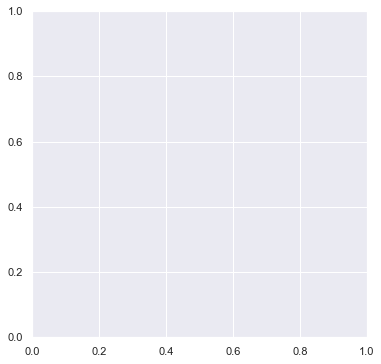

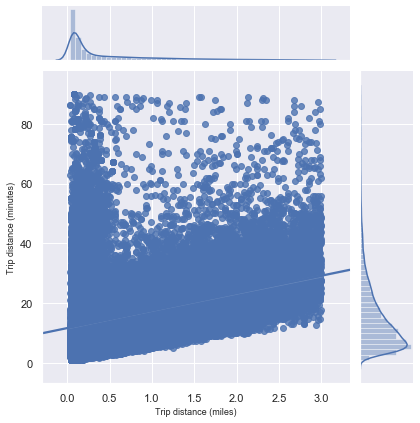

In [10]:
fig, ax = plt.subplots(figsize=(6,6))


data_cliped= data_merged[(data_merged['tripDistance_miles']<3) & (data_merged['tripDuration']<90)]
ax = sns.jointplot("tripDistance_miles","tripDuration", data=data_merged, kind="reg")

#axis label
ax.set_axis_labels('Trip distance (miles)', 'Trip distance (minutes)', fontsize=9)
# _ = plt.xlabel('Trip distance (miles)', fontsize=9)    
# _ = plt.ylabel('Trip distance (minutes)', fontsize=9)  
# # _ = ax.tick_params(axis='both', which='major', labelsize=9)
# _ = ax.tick_params(axis='both', which='minor', labelsize=9)



plt.savefig('results/DistanceDuration_jointplot_upto3miles.png', dpi=900)

## trip distance cummulative

In [11]:
data_merged[['tripDistance_miles','tripDuration']].quantile(0.85)

tripDistance_miles     1.206082
tripDuration          25.000000
Name: 0.85, dtype: float64

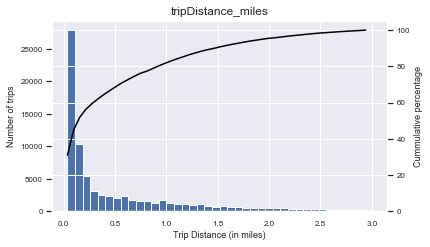

In [12]:
fig, ax = plt.subplots(figsize=(6,3.5))
data_a = data_merged[data_merged['tripDistance_miles']<3]

ax2=ax.twinx()
data_merged.hist('tripDistance_miles', ax=ax, bins=40)


data_distance = data_merged[['tripDistance_miles']]
# evaluate the histogram
values, base = np.histogram(data_distance, bins=50)
#evaluate the cumulative
cumulative = np.cumsum(values)
# plot the cumulative function
ax2.plot(base[:-1], cumulative/cumulative[-1]*100, color='black', linewidth=1.5)
ax2.set_ylabel('Cummulative percentage', fontsize=9)
ax2.axis([None, None, 0, 105])  

ax.grid(color='w', linestyle='-',axis='y', linewidth=0)


ax2.grid(color='w', linestyle='-', linewidth=1)
ax.set_xlabel('Trip Distance (in miles)', fontsize=9)
ax.set_ylabel('Number of trips', fontsize=9)
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax2.tick_params(axis='both', which='major', labelsize=8)

#plt.title('Trip distance cummulative distribution')

plt.savefig('results/Tripdistance_plot_upto3miles.png', dpi=900)

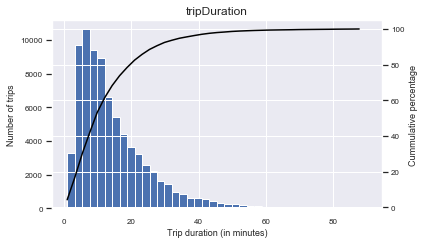

In [13]:
fig, ax = plt.subplots(figsize=(6,3.5))


ax2=ax.twinx()
data_merged.hist('tripDuration', ax=ax, bins=40)


data_distance = data_merged[['tripDuration']]
# evaluate the histogram
values, base = np.histogram(data_distance, bins=40)
#evaluate the cumulative
cumulative = np.cumsum(values)
# plot the cumulative function
ax2.plot(base[:-1], cumulative/cumulative[-1]*100, color='black', linewidth=1.5)
ax2.set_ylabel('Cummulative percentage' , fontsize=9)

ax.grid(color='w', linestyle='-',axis='y', linewidth=0)


ax2.grid(color='w', linestyle='-', linewidth=1)
ax.set_xlabel('Trip duration (in minutes)', fontsize=9)
ax.set_ylabel('Number of trips', fontsize=9)
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax2.tick_params(axis='both', which='major', labelsize=8)

#plt.title('Trip distance cummulative distribution')
plt.tight_layout()
plt.savefig('results/TripDuration_plot_upto3miles.png', dpi=900)

# Weekly variation

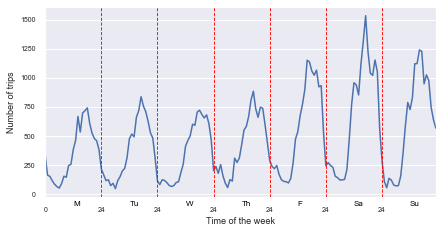

In [14]:
# data_week = data_merged.loc[(data_merged['startDateTime']>'2019-3-04') & (data_merged['startDateTime']<'2019-3-30')]

data_merged['week_no']=data_merged.apply(lambda x: x['startDateTime'].weekday(), axis=1)
data_merged['hour_no']=data_merged.apply(lambda x: x['startDateTime'].hour, axis=1)


fig, ax = plt.subplots(figsize=(7,3.5))
# data_device_cleaned.index = data_week['startDateTime']
# data_device_cleaned.groupby(data_device_cleaned.index.date)['sumdID'].nunique().plot.line(ax=ax)

data_merged.groupby(['week_no','hour_no']).count()['trip_id'].plot(ax=ax)
for x in np.arange(0,169,24):
    ax.axvline(x=x, color='red', linewidth=0.9, linestyle='--')

day_label=['M','Tu','W','Th','F','Sa','Su']
for x in np.arange(1,8,1):
    ax.text(-12+24*x,-100,day_label[x-1], color='black', fontsize=8)

#axis tick label
#ax.set_yticklabels['12,24']

ax.xaxis.set_minor_locator(MultipleLocator(6))
ax.xaxis.set_major_locator(MultipleLocator(24))
ax.set_xticklabels([0,0,24,24,24,24,24,24,24], fontsize=7)
plt.yticks(fontsize=7)

    
#axis label
plt.xlabel('Time of the week', fontsize=9)    
plt.ylabel('Number of trips', fontsize=9)    

plt.savefig('results/TripStart_variation_week.png', dpi=900)

In [15]:
data_merged.groupby(['week_no','hour_no']).count()['trip_id']

week_no  hour_no
0        0           335
         1           162
         2           152
         3           114
         4            84
                    ... 
6        19         1025
         20          976
         21          747
         22          639
         23          567
Name: trip_id, Length: 168, dtype: int64

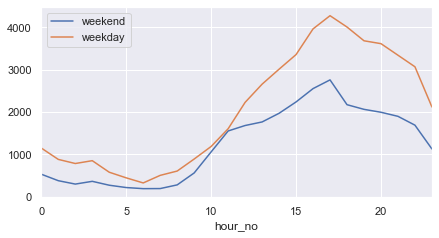

In [16]:
fig, ax = plt.subplots(figsize=(7,3.5))
data_merged[data_merged.weekend_trip==1].groupby(['hour_no']).count()['trip_id'].plot(label='weekend',ax=ax)
data_merged[data_merged.weekend_trip==0].groupby(['hour_no']).count()['trip_id'].plot( label='weekday',ax=ax)
plt.legend()
# sns.lineplot(x=data_merged[data_merged.weekend_trip==1].groupby(['hour_no']).count()['trip_id']
#                  label='weekend', ax=ax)
# sns.lineplot(x=data_merged[data_merged.weekend_trip==0].groupby(['hour_no']).count()['trip_id']
#                  label='weekday', ax=ax)
# ax4.set_title('Average trip speed')

In [49]:
data_merged[data_merged['startDateTime']==pd.Timestamp('2019-03-05')]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,trip_id,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startLatitude,...,trip_start_hour_no,weekend_trip,distance_GPS_trace_miles,StartTime_AMPeak,StartTime_Day,StartTime_PMPeak,StartTime_Night,route_directness,week_no,hour_no


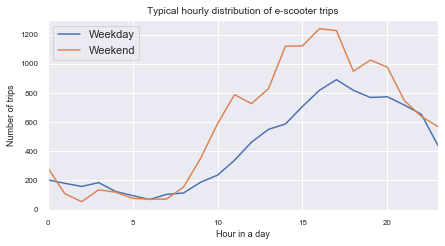

In [18]:
# data_merged['hour_no']=data_merged.apply(lambda x: x['startDateTime'].hour, axis=1)
data_merged_daty = data_merged.loc[data_merged['startDateTime']=='2019-3-03']


fig, ax = plt.subplots(figsize=(7,3.5))

d1=pd.DataFrame(data_merged.groupby(['week_no','hour_no']).count()['sumdID']).reset_index()
d1[(d1['week_no']>0) & (d1['week_no']<5)].drop(columns=['week_no']).rename(columns={'sumdID':'Weekday'}).groupby(['hour_no']).mean().plot(label='Weekday',ax=ax)
d1[(d1['week_no']>5) & (d1['week_no']<7)].drop(columns=['week_no']).rename(columns={'sumdID':'Weekend'}).groupby(['hour_no']).mean().plot(label='Weekend',ax=ax)

# data_merged.groupby(['hour_no']).count()['trip_id'].plot(ax=ax)
# data_merged[data_merged.weekend_trip==0].groupby(['hour_no']).count()['trip_id'].plot( label='weekday',ax=ax)
# plt.legend(False)
# sns.lineplot(x=data_merged[data_merged.weekend_trip==1].groupby(['hour_no']).count()['trip_id']
#                  label='weekend', ax=ax)
# sns.lineplot(x=data_merged[data_merged.weekend_trip==0].groupby(['hour_no']).count()['trip_id']
#                  label='weekday', ax=ax)


ax.set_title('Typical hourly distribution of e-scooter trips', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=8)
ax.set_xlabel('Hour in a day', fontsize=9)
ax.set_ylabel('Number of trips', fontsize=9)
# ax.legend().set_visible(False)

plt.savefig('results/TripStart_variation_week_day.png', dpi=900)

In [19]:
d1[(d1['week_no']>0) & (d1['week_no']<5)].drop(columns=['week_no']).rename(columns={'sumdID':'Weekday'})

,hour_no,Weekday
24,0,215
25,1,165
26,2,115
27,3,123
28,4,72
...,...,...
115,19,1022
116,20,1066
117,21,922
118,22,932


# Distribution by time

Text(0.5, 1.0, 'Average trip speed')

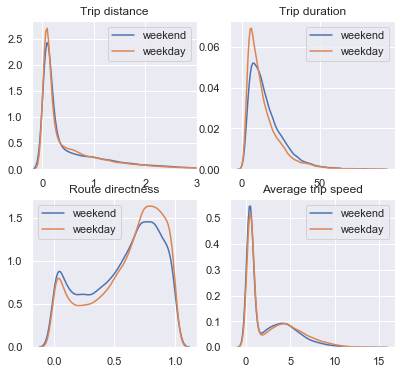

In [20]:
fig= plt.figure(figsize=(6.5,6))
#fig.suptitle('Distribution by time')




gspec = gridspec.GridSpec(2,2)
ax1 = plt.subplot(gspec[0,0])
ax2 = plt.subplot(gspec[0,1])
ax3 = plt.subplot(gspec[1,0])
ax4 = plt.subplot(gspec[1,1])
# ax5 = plt.subplot(gspec[2,0])
# ax6 = plt.subplot(gspec[2,1])


#by trip distance
sns.kdeplot(data_merged[data_merged.weekend_trip==1].loc[:,'tripDistance_miles'],
                 label='weekend', ax=ax1)
sns.kdeplot(data_merged[data_merged.weekend_trip==0].loc[:,'tripDistance_miles'],
                 label='weekday', ax=ax1)
ax1.axis([-0.2, 3, None, None])
ax1.set_title('Trip distance')


#by route directness
sns.kdeplot(data_merged[data_merged.weekend_trip==1].loc[:,'tripDuration'],
                 label='weekend', ax=ax2)
sns.kdeplot(data_merged[data_merged.weekend_trip==0].loc[:,'tripDuration'],
                 label='weekday', ax=ax2)
ax2.set_title('Trip duration')


#by route directness
sns.kdeplot(data_merged[data_merged.weekend_trip==1].loc[:,'route_directness'],
                 label='weekend', ax=ax3)
sns.kdeplot(data_merged[data_merged.weekend_trip==0].loc[:,'route_directness'],
                 label='weekday', ax=ax3)
ax3.set_title('Route directness')

#by average trip speed
sns.kdeplot(data_merged[data_merged.weekend_trip==1].loc[:,'average_trip_speed_mph'],
                 label='weekend', ax=ax4)
sns.kdeplot(data_merged[data_merged.weekend_trip==0].loc[:,'average_trip_speed_mph'],
                 label='weekday', ax=ax4)
ax4.set_title('Average trip speed')

# #short term parking
# sns.kdeplot(data_merged[data_merged.weekend_trip==1].loc[:,'destination_SHT_PRK_density'],
#                  label='weekend', ax=ax5)
# sns.kdeplot(data_merged[data_merged.weekend_trip==0].loc[:,'destination_SHT_PRK_density'],
#                  label='weekday', ax=ax5)
# ax5.set_title('Destination short term paking density')

# #long term parking
# sns.kdeplot(data_merged[data_merged.weekend_trip==1].loc[:,'destination_LNG_PRK_density'],
#                  label='weekend', ax=ax6)
# sns.kdeplot(data_merged[data_merged.weekend_trip==0].loc[:,'destination_LNG_PRK_density'],
#                  label='weekday', ax=ax6)
# ax6.set_title('Destination long term paking density')



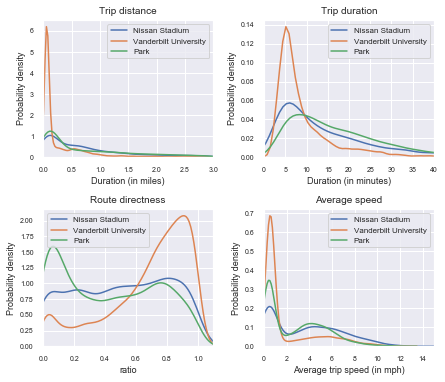

In [21]:
fig= plt.figure(figsize=(7,6))
#fig.suptitle('Distribution by destination')


gspec = gridspec.GridSpec(2,2)
ax1 = plt.subplot(gspec[0,0])
ax2 = plt.subplot(gspec[0,1])
ax3 = plt.subplot(gspec[1,0])
ax4 = plt.subplot(gspec[1,1])
# ax5 = plt.subplot(gspec[2,0])
# ax6 = plt.subplot(gspec[2,1])


#by trip distance
sns.kdeplot(data_merged[data_merged.destination_NFL_DRAFT==1].loc[:,'tripDistance_miles'],
                 label='Nissan Stadium', ax=ax1)
sns.kdeplot(data_merged[data_merged.destination_VANDERBILT==1].loc[:,'tripDistance_miles'],
                 label='Vanderbilt University', ax=ax1)
sns.kdeplot(data_merged[data_merged.destination_PARK==1].loc[:,'tripDistance_miles'],
                 label='Park', ax=ax1)
ax1.axis([0, 3, None, None])

ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.legend(fontsize=8)

ax1.set_title('Trip distance', fontsize=10)
ax1.set_xlabel('Duration (in miles)', fontsize=9)
ax1.set_ylabel('Probability density', fontsize=9)


#by route duration
sns.kdeplot(data_merged[data_merged.destination_NFL_DRAFT==1].loc[:,'tripDuration'],
                 label='Nissan Stadium', ax=ax2)
sns.kdeplot(data_merged[data_merged.destination_VANDERBILT==1].loc[:,'tripDuration'],
                 label='Vanderbilt University', ax=ax2)
sns.kdeplot(data_merged[data_merged.destination_PARK==1].loc[:,'tripDuration'],
                 label='Park', ax=ax2)
ax2.axis([0, 40, None, None])

ax2.tick_params(axis='both', which='major', labelsize=7)
ax2.legend(fontsize=8)

ax2.set_title('Trip duration', fontsize=10)
ax2.set_xlabel('Duration (in minutes)', fontsize=9)
ax2.set_ylabel('Probability density', fontsize=9)


#by route directness
sns.kdeplot(data_merged[data_merged.destination_NFL_DRAFT==1].loc[:,'route_directness'],
                 label='Nissan Stadium', ax=ax3)
sns.kdeplot(data_merged[data_merged.destination_VANDERBILT==1].loc[:,'route_directness'],
                 label='Vanderbilt University', ax=ax3)
sns.kdeplot(data_merged[data_merged.destination_PARK==1].loc[:,'route_directness'],
                 label='Park', ax=ax3)
ax3.axis([0, 1.1, None, None])

ax3.tick_params(axis='both', which='major', labelsize=7)
ax3.legend(fontsize=8)

ax3.set_title('Route directness', fontsize=10)
ax3.set_xlabel('ratio', fontsize=9)
ax3.set_ylabel('Probability density', fontsize=9)


#by average trip speed
sns.kdeplot(data_merged[data_merged.destination_NFL_DRAFT==1].loc[:,'average_trip_speed_mph'],
                 label='Nissan Stadium', ax=ax4)
sns.kdeplot(data_merged[data_merged.destination_VANDERBILT==1].loc[:,'average_trip_speed_mph'],
                 label='Vanderbilt University', ax=ax4)
sns.kdeplot(data_merged[data_merged.destination_PARK==1].loc[:,'average_trip_speed_mph'],
                 label='Park', ax=ax4)
ax4.axis([0, 15, None, None])


ax4.tick_params(axis='both', which='major', labelsize=7)
ax4.legend(fontsize=8)

ax4.set_title('Average speed', fontsize=10)
ax4.set_xlabel('Average trip speed (in mph)', fontsize=9)
ax4.set_ylabel('Probability density', fontsize=9)



plt.subplots_adjust(hspace=0.38, wspace=0.3)
#plt.show()

plt.savefig('results/comparision_by_destination_type_upto3miles.png', dpi=900)

## Distribution by start time

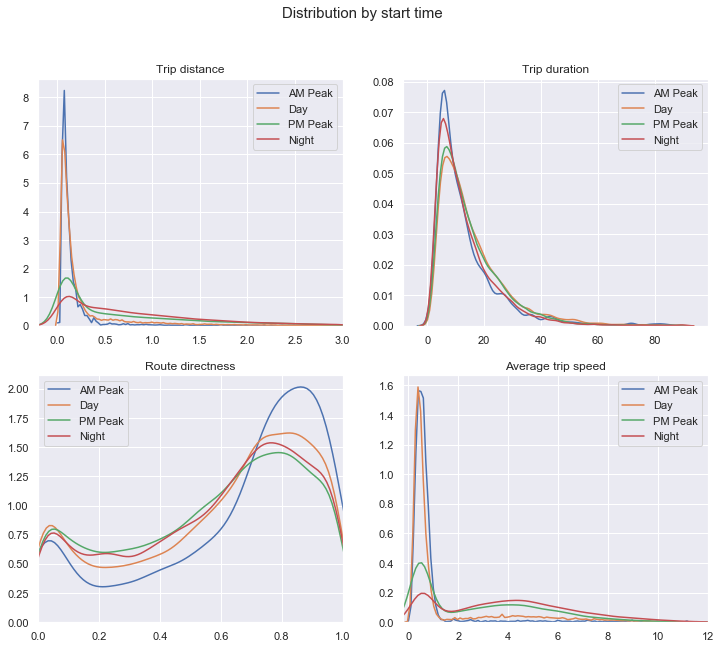

In [22]:
    
fig= plt.figure(figsize=(12,10))
fig.suptitle('Distribution by start time', fontsize=15)


gspec = gridspec.GridSpec(2,2)
ax1 = plt.subplot(gspec[0,0])
ax2 = plt.subplot(gspec[0,1])
ax3 = plt.subplot(gspec[1,0])
ax4 = plt.subplot(gspec[1,1])


#by trip distance
sns.kdeplot(data_merged[data_merged.StartTime_AMPeak==1].loc[:,'tripDistance_miles'],
                 label='AM Peak', ax=ax1)
sns.kdeplot(data_merged[data_merged.StartTime_Day==1].loc[:,'tripDistance_miles'],
                 label='Day', ax=ax1)
sns.kdeplot(data_merged[data_merged.StartTime_PMPeak==1].loc[:,'tripDistance_miles'],
                 label='PM Peak', ax=ax1)
sns.kdeplot(data_merged[data_merged.StartTime_Night==1].loc[:,'tripDistance_miles'],
                 label='Night', ax=ax1)
ax1.axis([-0.2, 3, None, None])
ax1.set_title('Trip distance')


#by route directness
sns.kdeplot(data_merged[data_merged.StartTime_AMPeak==1].loc[:,'tripDuration'],
                 label='AM Peak', ax=ax2)
sns.kdeplot(data_merged[data_merged.StartTime_Day==1].loc[:,'tripDuration'],
                 label='Day', ax=ax2)
sns.kdeplot(data_merged[data_merged.StartTime_PMPeak==1].loc[:,'tripDuration'],
                 label='PM Peak', ax=ax2)
sns.kdeplot(data_merged[data_merged.StartTime_Night==1].loc[:,'tripDuration'],
                 label='Night', ax=ax2)
ax2.set_title('Trip duration')


#by route directness
sns.kdeplot(data_merged[data_merged.StartTime_AMPeak==1].loc[:,'route_directness'],
                 label='AM Peak', ax=ax3)
sns.kdeplot(data_merged[data_merged.StartTime_Day==1].loc[:,'route_directness'],
                 label='Day', ax=ax3)
sns.kdeplot(data_merged[data_merged.StartTime_PMPeak==1].loc[:,'route_directness'],
                 label='PM Peak', ax=ax3)
sns.kdeplot(data_merged[data_merged.StartTime_Night==1].loc[:,'route_directness'],
                 label='Night', ax=ax3)
ax3.axis([0, 1, None, None])
ax3.set_title('Route directness')

#by average trip speed
sns.kdeplot(data_merged[data_merged.StartTime_AMPeak==1].loc[:,'average_trip_speed_mph'],
                 label='AM Peak', ax=ax4)
sns.kdeplot(data_merged[data_merged.StartTime_Day==1].loc[:,'average_trip_speed_mph'],
                 label='Day', ax=ax4)
sns.kdeplot(data_merged[data_merged.StartTime_PMPeak==1].loc[:,'average_trip_speed_mph'],
                 label='PM Peak', ax=ax4)
sns.kdeplot(data_merged[data_merged.StartTime_Night==1].loc[:,'average_trip_speed_mph'],
                 label='Night', ax=ax4)
ax4.axis([-0.2, 12, None, None])
ax4.set_title('Average trip speed')


plt.subplots_adjust(hspace=0.2, wspace=0.2)


## Destination density

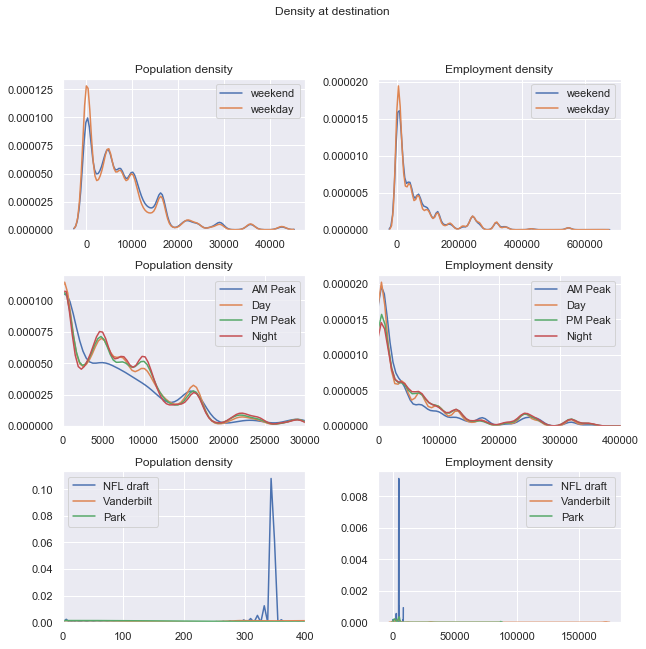

In [23]:


fig= plt.figure(figsize=(10,10))
fig.suptitle('Density at destination')

gspec = gridspec.GridSpec(3,2)
ax1 = plt.subplot(gspec[0,0])
ax2 = plt.subplot(gspec[0,1])
ax3 = plt.subplot(gspec[1,0])
ax4 = plt.subplot(gspec[1,1])
ax5 = plt.subplot(gspec[2,0])
ax6 = plt.subplot(gspec[2,1])


#population density at destination by week time
sns.kdeplot(data_merged[data_merged.weekend_trip==1].loc[:,'destination_pop_density_perMile'],
                 label='weekend', ax=ax1)
sns.kdeplot(data_merged[data_merged.weekend_trip==0].loc[:,'destination_pop_density_perMile'],
                 label='weekday', ax=ax1)
ax1.set_title('Population density')


#employment density at destination by week time
sns.kdeplot(data_merged[data_merged.weekend_trip==1].loc[:,'destination_emp_density_perMile'],
                 label='weekend', ax=ax2)
sns.kdeplot(data_merged[data_merged.weekend_trip==0].loc[:,'destination_emp_density_perMile'],
                 label='weekday', ax=ax2)
ax2.set_title('Employment density')


#population density at destination by time of day
sns.kdeplot(data_merged[data_merged.StartTime_AMPeak==1].loc[:,'destination_pop_density_perMile'],
                 label='AM Peak', ax=ax3)
sns.kdeplot(data_merged[data_merged.StartTime_Day==1].loc[:,'destination_pop_density_perMile'],
                 label='Day', ax=ax3)
sns.kdeplot(data_merged[data_merged.StartTime_PMPeak==1].loc[:,'destination_pop_density_perMile'],
                 label='PM Peak', ax=ax3)
sns.kdeplot(data_merged[data_merged.StartTime_Night==1].loc[:,'destination_pop_density_perMile'],
                 label='Night', ax=ax3)
ax3.axis([-0.2, 30000, None, None])
ax3.set_title('Population density')


#employment density at destination by time of day
sns.kdeplot(data_merged[data_merged.StartTime_AMPeak==1].loc[:,'destination_emp_density_perMile'],
                 label='AM Peak', ax=ax4)
sns.kdeplot(data_merged[data_merged.StartTime_Day==1].loc[:,'destination_emp_density_perMile'],
                 label='Day', ax=ax4)
sns.kdeplot(data_merged[data_merged.StartTime_PMPeak==1].loc[:,'destination_emp_density_perMile'],
                 label='PM Peak', ax=ax4)
sns.kdeplot(data_merged[data_merged.StartTime_Night==1].loc[:,'destination_emp_density_perMile'],
                 label='Night', ax=ax4)
ax4.axis([-0.2, 400000, None, None])
ax4.set_title('Employment density')



#population density at destination by location type
sns.kdeplot(data_merged[data_merged.destination_NFL_DRAFT==1].loc[:,'destination_pop_density_perMile'],
                 label='NFL draft', ax=ax5)
sns.kdeplot(data_merged[data_merged.destination_VANDERBILT==1].loc[:,'destination_pop_density_perMile'],
                 label='Vanderbilt', ax=ax5)
sns.kdeplot(data_merged[data_merged.destination_PARK==1].loc[:,'destination_pop_density_perMile'],
                 label='Park', ax=ax5)
ax5.axis([-0.2, 400, None, None])
ax5.set_title('Population density')


#employment density at destination by location type
sns.kdeplot(data_merged[data_merged.destination_NFL_DRAFT==1].loc[:,'destination_emp_density_perMile'],
                 label='NFL draft', ax=ax6)
sns.kdeplot(data_merged[data_merged.destination_VANDERBILT==1].loc[:,'destination_emp_density_perMile'],
                 label='Vanderbilt', ax=ax6)
sns.kdeplot(data_merged[data_merged.destination_PARK==1].loc[:,'destination_emp_density_perMile'],
                 label='Park', ax=ax6)
ax5.axis([-0.2, 400, None, None])
ax6.set_title('Employment density')

plt.subplots_adjust(hspace=0.3, wspace=0.3)
#plt.tight_layout()

## Origin density

Text(0.5, 1.0, 'Employment density')

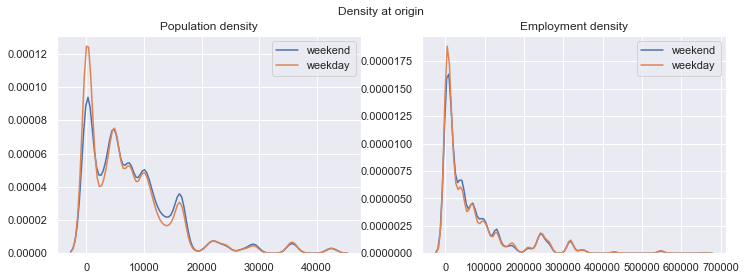

In [24]:
fig= plt.figure(figsize=(12,4))
fig.suptitle('Density at origin')

gspec = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gspec[0,0])
ax2 = plt.subplot(gspec[0,1])
sns.kdeplot(data_merged[data_merged.weekend_trip==1].loc[:,'origin_pop_density_perMile'],
                 label='weekend', ax=ax1)
sns.kdeplot(data_merged[data_merged.weekend_trip==0].loc[:,'origin_pop_density_perMile'],
                 label='weekday', ax=ax1)
ax1.set_title('Population density')



sns.kdeplot(data_merged[data_merged.weekend_trip==1].loc[:,'origin_emp_density_perMile'],
                 label='weekend', ax=ax2)
sns.kdeplot(data_merged[data_merged.weekend_trip==0].loc[:,'origin_emp_density_perMile'],
                 label='weekday', ax=ax2)
ax2.set_title('Employment density')




# descriptive stat

In [25]:
var_orderd=['tripDuration','tripDistance_miles','average_trip_speed_mph','route_directness',
            'origin_CBD','origin_URBAN','origin_SU','origin_RURAL',
            'origin_emp_density_perMile','origin_pop_density_perMile',
            'origin_SHT_PRK_density','origin_LNG_PRK_density',
            'destination_CBD','destination_URBAN','destination_SU','destination_RURAL',
            'destination_emp_density_perMile','destination_pop_density_perMile',
            'destination_SHT_PRK_density','destination_LNG_PRK_density',
            'weekend_trip','StartTime_AMPeak','StartTime_Day',
            'StartTime_PMPeak','StartTime_Night',
            'origin_NFL_DRAFT','origin_VANDERBILT','origin_PARK',
            'destination_NFL_DRAFT','destination_VANDERBILT','destination_PARK']
data_merged[var_orderd].describe().transpose().to_csv('results/descriptive_stat_orderd.csv')